In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
import numpy
import pandas as pd

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

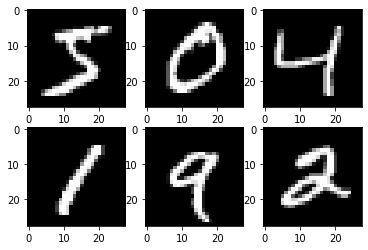

In [4]:
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

input_shape = (28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
def create_model():
    num_classes = 10
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = create_model()

In [9]:
model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=200, epochs=10,verbose=2)
print("The model has successfully trained")

model.save('model.h5')
print("Saving the model as model.h5")

Epoch 1/10
300/300 - 119s - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0286 - val_accuracy: 0.9918
Epoch 2/10
300/300 - 83s - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0314 - val_accuracy: 0.9914
Epoch 3/10
300/300 - 86s - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.0264 - val_accuracy: 0.9929
Epoch 4/10
300/300 - 82s - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0280 - val_accuracy: 0.9922
Epoch 5/10
300/300 - 83s - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.0309 - val_accuracy: 0.9911
Epoch 6/10
300/300 - 89s - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0273 - val_accuracy: 0.9926
Epoch 7/10
300/300 - 85s - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0283 - val_accuracy: 0.9925
Epoch 8/10
300/300 - 85s - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0275 - val_accuracy: 0.9930
Epoch 9/10
300/300 - 86s - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.0301 - val_accuracy: 0.9928
Epoch 10/10
300/300 - 84s - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0284 - val_accur

In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.76%
